In [1]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from earlystop import EarlyStopper
from lstm_models import AirModel, StackLSTM, AirModel_DropOut


#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

sns.set_style("darkgrid")


import numpy as np
import random
import os, errno
from tqdm import tqdm

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torch.utils.data as data_utils

c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
#fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file7_080124.mat"
cutoff = [8/1000, 11/1000]

mat = ds.MatFileToDataFrame(fpath, fname)

df_ = mat.get_dataframe(cutoff)

x = dc.CaractDefect(df_)
taus = x.get_tau()[1]

hilbert, _ = x.get_hilbert()

df = pd.merge(df_, hilbert, on = 'Hilbert Transform', how = 'outer')

df.head()

,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
0,0.134180,0.023473,0.002203,0.002203-0.001490j,0.002659,-0.594742,-0.051439
1,0.135824,0.025117,0.002051,0.002051+0.000170j,0.002058,0.082612,-0.020024
2,0.136482,0.025775,0.001900,0.001900+0.000303j,0.001924,0.158163,0.009547
3,0.137797,0.027090,0.001749,0.001749+0.000903j,0.001969,0.476669,0.035605
4,0.137797,0.027090,0.001599,0.001599+0.000993j,0.001882,0.555726,0.056848


### **data**

In [3]:
amplitudes = df['Amplitude'][300:30000].values
train, val = utils.split_data(amplitudes)
x_train, y_train = utils.create_dataset(train, 100)
x_val, y_val = utils.create_dataset(val, 100)
train_loader = utils.create_loader(x_train, y_train, 32)
val_loader = utils.create_loader(x_val, y_val, 32)

print(x_train.shape, y_train.shape ,x_val.shape, y_val.shape)

torch.Size([23660, 100, 1]) torch.Size([23660, 100, 1]) torch.Size([5840, 100, 1]) torch.Size([5840, 100, 1])


## **model**


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0, Train Loss: 5.580869818655825e-05, Test Loss: 7.488981305207949e-07
Epoch: 0, Loss: 4.052323220093967e-06


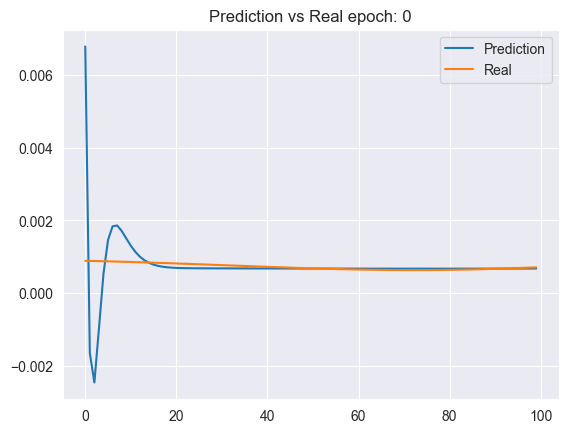

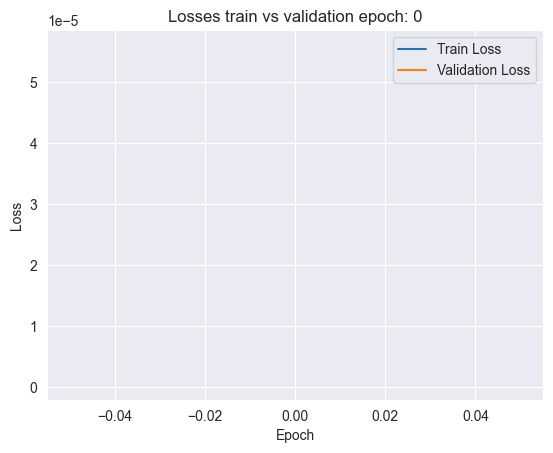

  0%|          | 0/100 [00:15<?, ?it/s]


TypeError: '<' not supported between instances of 'list' and 'float'

In [4]:
model = AirModel_DropOut()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
n_epochs = 100
ncheckpoint = 10

m, av_train, av_val = utils.train_model(model, optimizer, criterion, train_loader, val_loader, n_epochs, ncheckpoint)